In [21]:
# import geotaste
import sys; sys.path.insert(0,'..')
from geotaste import *

## app
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

from jupyter_dash import JupyterDash

In [33]:
# import plotly.graph_objects as go
# import pandas as pd

# df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
# df_airports.head()

# df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
# df_flight_paths.head()

# fig = go.Figure()

# fig.add_trace(go.Scattergeo(
#     locationmode = 'USA-states',
#     lon = df_airports['long'],
#     lat = df_airports['lat'],
#     hoverinfo = 'text',
#     text = df_airports['airport'],
#     mode = 'markers',
#     marker = dict(
#         size = 2,
#         color = 'rgb(255, 0, 0)',
#         line = dict(
#             width = 3,
#             color = 'rgba(68, 68, 68, 0)'
#         )
#     )))

# flight_paths = []
# for i in range(len(df_flight_paths)):
#     fig.add_trace(
#         go.Scattergeo(
#             locationmode = 'USA-states',
#             lon = [df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i]],
#             lat = [df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i]],
#             mode = 'lines+markers',
#             marker=dict(
#                 symbol="arrow",
#                 size=15,
#                 angleref="previous",
#             ),
#             line = dict(width = 1,color = 'red'),
#             opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
#         )
#     )

# fig.update_layout(
#     title_text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
#     showlegend = False,
#     geo = dict(
#         scope = 'north america',
#         projection_type = 'azimuthal equal area',
#         showland = True,
#         landcolor = 'rgb(243, 243, 243)',
#         countrycolor = 'rgb(204, 204, 204)',
#     ),
# )



# fig.show()

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

np.random.seed(1)
I_list = list(np.random.randint(0,3229,10))
skiplist = set(range(1, 3229)) - set(I_list)
locations = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv', skiprows=skiplist)

scale = 5000

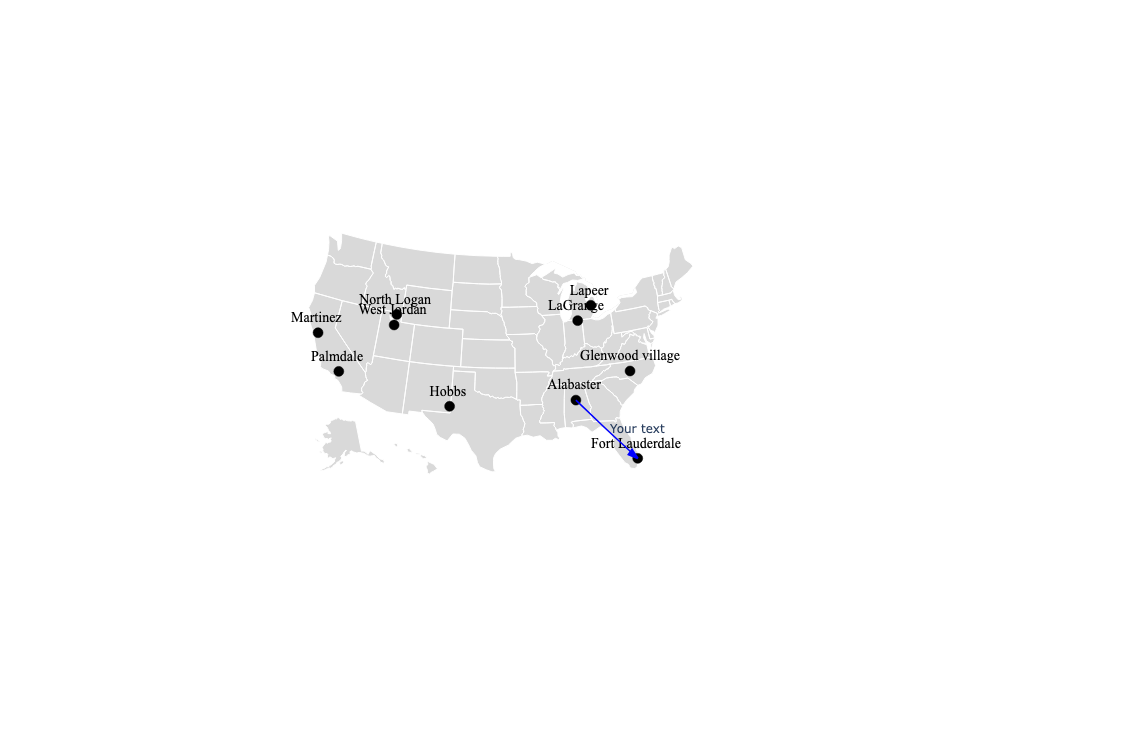

In [32]:

fig = go.Figure()
fig.add_trace(
    go.Scattergeo(
        locationmode = 'USA-states',
        lon = locations['lon'],
        lat = locations['lat'],
        text = locations['name'],
        textfont = {"color": 'black',
                    "family":'Times New Roman',
                    "size":14},
        textposition="top center",
        name = "Candidate Facility",
        mode ="markers+text",
        marker = dict(
            size = 10,
            color = "black",
            line_color='black',
            line_width=0.5,
            sizemode = 'area')
    )
)



# def add_line(

fig.add_trace(
    go.Scattergeo(
        lat = [locations['lat'][5], locations['lat'][0]], 
        lon = [locations['lon'][5], locations['lon'][0]],
        mode = 'lines',
        line = dict(width = 1.5, color = 'blue'),
    ))

#Workaround to get the arrow at the end of an edge AB

l = 1.1  # the arrow length
widh =0.035  #2*widh is the width of the arrow base as triangle

A = np.array([locations['lon'][5], locations['lat'][5]])
B = np.array([locations['lon'][0], locations['lat'][0]])
v = B-A
w = v/np.linalg.norm(v)     
u  =np.array([-v[1], v[0]])  #u orthogonal on  w
         
P = B-l*w
S = P - widh*u
T = P + widh*u

fig.add_trace(go.Scattergeo(lon = [S[0], T[0], B[0], S[0]], 
                            lat =[S[1], T[1], B[1], S[1]], 
                            mode='lines', 
                            fill='toself', 
                            fillcolor='blue', 
                            line_color='blue'))
#------Display your text at the middle of the segment AB
fig.add_trace(go.Scattergeo(lon =[0.5*(A+B)[0]], lat = [0.5*(A+B)[1]], mode='text', text='               Your text'))

fig.update_layout(width=900, height=750,
        showlegend = False,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)'))

In [20]:
# import plotly.express as px
# import pandas as pd

# us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
# us_cities = us_cities.query("State in ['New York', 'Ohio']")
# fig = px.line_mapbox(us_cities, lat="lat", lon="lon", color="State", zoom=3, height=300)
# fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=4, mapbox_center_lat = 41,
#     margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()


In [19]:
# # Make app
# app = JupyterDash(__name__)

# app.layout = html.Div([
#     html.H1(children='GeoTaste', style={'textAlign':'center'}),
#     dcc.Dropdown(df.country.unique(), 'Canada', id='dropdown-selection'),
#     dcc.Graph(id='graph-content')
# ])

# @callback(
#     Output('graph-content', 'figure'),
#     Input('dropdown-selection', 'value')
# )
# def update_graph(value):
#     dff = df[df.country==value]
#     return px.line(dff, x='year', y='pop')

 
    
    
# # go !
# if __name__=='__main__':app.run_server(mode="jupyterlab")

Dash is running on http://127.0.0.1:8050/

